In [1]:
import pulp

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import numpy as np 

In [4]:
N = 10
agents = np.zeros((N, 2))

In [5]:
# all agents have same value of good 
agents[:, 0] = np.random.randint(1, 101, N)
# half agents are poor
agents[: N // 2, 1] = np.random.randint(80, 101, N // 2)
# other half are rich 
agents[N // 2 :, 1] = np.random.randint(1, 11, N // 2)

In [6]:
agents

array([[ 61.,  90.],
       [ 92.,  85.],
       [ 79.,  87.],
       [ 93.,  83.],
       [ 13.,  90.],
       [100.,   7.],
       [ 89.,   1.],
       [ 94.,   1.],
       [ 29.,   7.],
       [ 44.,   4.]])

In [7]:
M = 5
#alpha = np.mean(agents[:, 1])
alpha = 0

In [8]:
prob = pulp.LpProblem("Welfare_Maximization", pulp.LpMaximize)

In [9]:
# Create variables
x = pulp.LpVariable.dicts("Allocation", range(N), 0, 1)  # allocation per agent
p = pulp.LpVariable.dicts("Price", range(N), 0)  # price per agent
t = pulp.LpVariable.dicts("Time", range(N), 0)  # time per agent

In [10]:
# Objective function
prob += pulp.lpSum([agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] + alpha * p[i] for i in range(N)])

In [11]:
# Constraint: sum of the allocations <= M
prob += pulp.lpSum(x) <= M

In [12]:
for i in range(N):
    prob += agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] >= 0  # utility > 0


In [13]:
# Constraints: individual rationality and incentive compatibility
for i in range(N):
    prob += agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] >= 0  # utility > 0
    for j in range(N):
        if i != j:
            prob += agents[i][0] * x[i] - agents[i][1] * p[i] - t[i] >= agents[i][0] * x[j] - agents[i][1] * p[j] - t[j]  # utility from own allocation >= utility from other's allocation


In [14]:
# Solve problem
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/benjaminwittenbrink/opt/anaconda3/envs/cs360/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/64/knc2zn357c35n6k0cyxpqm_40000gn/T/8f3958f8cbc14a208fe8cab87612915a-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/64/knc2zn357c35n6k0cyxpqm_40000gn/T/8f3958f8cbc14a208fe8cab87612915a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 116 COLUMNS
At line 757 RHS
At line 869 BOUNDS
At line 880 ENDATA
Problem MODEL has 111 rows, 30 columns and 610 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 101 (-10) rows, 30 (0) columns and 580 (-30) elements
0  Obj -0 Dual inf 204.41509 (10)
31  Obj 358.61603 Primal inf 1.2017134 (5)
33  Obj 358.13956
Optimal - objective value 358.13956
After Postsolve, objective 358.13956, infeasibilities - dual 0 (0), primal 0 (0)
Optima

1

In [15]:
# Print optimal values
for i in range(N):
    if x[i].varValue != 0:
        print(f"Agent {i}: Allocation = {x[i].varValue}, Price = {p[i].varValue}, Time = {t[i].varValue}")

Agent 0: Allocation = 0.44679811, Price = 0.0, Time = 5.8083755
Agent 1: Allocation = 0.44679811, Price = 0.0, Time = 5.8083755
Agent 2: Allocation = 0.44679811, Price = 0.0, Time = 5.8083755
Agent 3: Allocation = 0.44679811, Price = 0.0, Time = 5.8083755
Agent 5: Allocation = 0.60135074, Price = 0.095861755, Time = 12.225244
Agent 6: Allocation = 1.0, Price = 7.5373146, Time = 0.0
Agent 7: Allocation = 1.0, Price = 7.5373146, Time = 0.0
Agent 8: Allocation = 0.25541456, Price = 0.036893215, Time = 0.0
Agent 9: Allocation = 0.35604225, Price = 0.45377933, Time = 0.0


In [16]:
# Store optimal values 
allocations = []
prices = []
times = []
nonzero_i = []
menus = {}
menus[0.0, 0.0, 0.0] = []
for i in range(N):
    bundle = (x[i].varValue, p[i].varValue, t[i].varValue)
    allocations.append(bundle[0])
    prices.append(bundle[1])
    times.append(bundle[2])
    if x[i].varValue > 0: nonzero_i.append(i)

    if bundle not in menus: 
        menus[bundle] = []

    menus[bundle].append(i)

{(0.21761271, 0.002417919, 0.64074853): [0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 36, 37, 39, 40, 41, 42, 44, 45, 47, 48, 49], (0.21755776, 0.0, 0.87023102): [4, 14], (0.0, 0.0, 0.0): [9, 13, 26, 46], (0.21559778, 0.12935867, 0.0): [32, 34, 35, 38, 43]}


In [17]:
# N for each menu: 
for i, b in enumerate(menus): 
    print(f"Menu {i}: {b[0]} got; {b[1]} spent; {b[2]} burned: {len(menus[b])} agents")

Menu 0: 0.44679811 got; 0.0 spent; 5.8083755 burned: 4 agents
Menu 1: 0.0 got; 0.0 spent; 0.0 burned: 1 agents
Menu 2: 0.60135074 got; 0.095861755 spent; 12.225244 burned: 1 agents
Menu 3: 1.0 got; 7.5373146 spent; 0.0 burned: 2 agents
Menu 4: 0.25541456 got; 0.036893215 spent; 0.0 burned: 1 agents
Menu 5: 0.35604225 got; 0.45377933 spent; 0.0 burned: 1 agents


Menu 0: 0.4468 got; 0.0 spent; 5.8084 burned
Menu 1: 0.0 got; 0.0 spent; 0.0 burned
Menu 2: 0.6014 got; 0.0959 spent; 12.2252 burned
Menu 3: 1.0 got; 7.5373 spent; 0.0 burned
Menu 4: 0.2554 got; 0.0369 spent; 0.0 burned
Menu 5: 0.356 got; 0.4538 spent; 0.0 burned


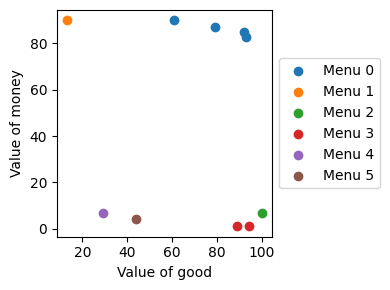

In [18]:
# let's visualize the menus by plots 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(1, 1, figsize=(4,3))
digits = 4
for i, b in enumerate(menus): 
    print(f"Menu {i}: {np.round(b[0], digits)} got; {np.round(b[1], digits)} spent; {np.round(b[2], digits)} burned")
    agents_i = menus[b]
    ax.scatter(agents[agents_i, 0], agents[agents_i, 1], color = colors[i], label = f"Menu {i}")

ax.set_xlabel("Value of good")
ax.set_ylabel("Value of money")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [19]:
# Check IR and IC constraints
eps = 1e-4
for i in range(N):
    util_i = agents[i][0] * allocations[i] - agents[i][1] * prices[i] - times[i]
    if util_i + eps < 0: print(f"IR violated at {i}")
    for j in range(N):
        if i != j:
            util_j = agents[i][0] * allocations[j] - agents[i][1] * prices[j] - times[j]
            if util_i + eps < util_j:
                print(f"IC violated at ({i}, {j})")
                print(f"Utility of i: {util_i}; Utility of j: {util_j}")


### Indifference Curves

Below we will complete an exercise to plot the indifference regions induced by the menus.

In [20]:
# convert menus to array 
menus_arr = np.vstack(list(menus.keys()))

# define function to get optimal menu given a row
def get_optimal_menu(row):
    row = row.copy()
    row[1] *= -1 
    row = np.concatenate((row, [-1]))
    val = menus_arr.dot(row)
    return np.argmax(val)

# define grid
x = np.linspace(0, 101, 1000)
y = np.linspace(0, 101, 1000)
xv, yv = np.meshgrid(x, y)
xygrid = np.vstack((xv.flatten(), yv.flatten())).T

In [21]:
# get optimal menu at each point in grid, note this isn't most efficient way to do this
opt_men = np.apply_along_axis(get_optimal_menu, 1, xygrid)

Menu 0: 0.4468 got; 0.0 spent; 5.8084 burned
Menu 1: 0.0 got; 0.0 spent; 0.0 burned
Menu 2: 0.6014 got; 0.0959 spent; 12.2252 burned
Menu 3: 1.0 got; 7.5373 spent; 0.0 burned
Menu 4: 0.2554 got; 0.0369 spent; 0.0 burned
Menu 5: 0.356 got; 0.4538 spent; 0.0 burned


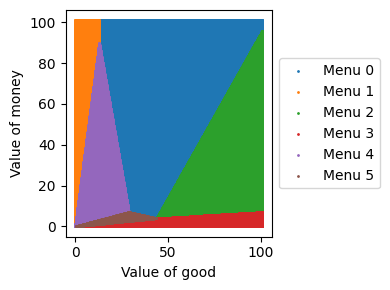

In [22]:
# plot indifference curves

fig, ax = plt.subplots(1, 1, figsize=(4,3))
for i, b in enumerate(menus): 
    print(f"Menu {i}: {np.round(b[0], digits)} got; {np.round(b[1], digits)} spent; {np.round(b[2], digits)} burned")
    pts_i = np.where(opt_men == i)
    ax.scatter(xygrid[pts_i, 0], xygrid[pts_i, 1], color = colors[i], label = f"Menu {i}", s = 1)

ax.set_xlabel("Value of good")
ax.set_ylabel("Value of money")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()